In [454]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

## Calculando valores promedio y desviacion estandar

In [455]:
dataArray = [
    "numeros_aleatorios_100.csv",
    "numeros_aleatorios_1000.csv",
    "numeros_aleatorios_2000.csv",
    "numeros_aleatorios_3000.csv",
    "numeros_aleatorios_4000.csv",
    "numeros_aleatorios_5000.csv",
    "numeros_aleatorios_6000.csv",
    "numeros_aleatorios_7000.csv",
    "numeros_aleatorios_8000.csv",
    "numeros_aleatorios_9000.csv",
    "numeros_aleatorios_10000.csv",
    "numeros_aleatorios_20000.csv",
    "numeros_aleatorios_30000.csv",
    "numeros_aleatorios_40000.csv",
    "numeros_aleatorios_50000.csv",
]

algorithmsList = [
    "bubbleSort",
    "insertionSort",
    "mergeSort",
    "quickSort",
    "bucketSort",
    "countingSort",
]

languages = ["cpp", "go", "python"]

Calculando los valores promedios.

In [456]:
for language in languages:
    registros=[]
    for i in range(1, 6):
        fileName='./results/'+language+'/record'+str(i)+'.json'
        with open(fileName) as json_file:
            registros.append(json.load(json_file))

    averages = {}

    for dataset, value in registros[0].items():
        averages[dataset] = {}
        for algoritmo in value.keys():
            tiempos=[registro[dataset][algoritmo] for registro in registros]
            averages[dataset][algoritmo] = sum(tiempos)/len(tiempos)

    with open("./average/"+language+".json", "w") as file:
        json.dump(averages, file, indent=4)

    valoresStadisticos={}

    for dataset, value in registros[0].items():
        valoresStadisticos[dataset] = {}
        for algoritmo in value.keys():
            tiempos=[registro[dataset][algoritmo] for registro in registros]
            valoresStadisticos[dataset][algoritmo] = {
                'mean': np.mean(tiempos),
                'median': np.median(tiempos),
                'stdev': np.std(tiempos),
                'variance': np.var(tiempos)
            }
    with open("./statistics/"+language+".json", "w") as file:
        json.dump(valoresStadisticos, file, indent=4)




Comparativa de los tiempos de ejecución en cada lenguaje de programación(para cambiar el lenguaje a analizar, cambiar la variable "language" por "cpp" para analizar C++, "go" para analizar Go y "python" para analizar Python).

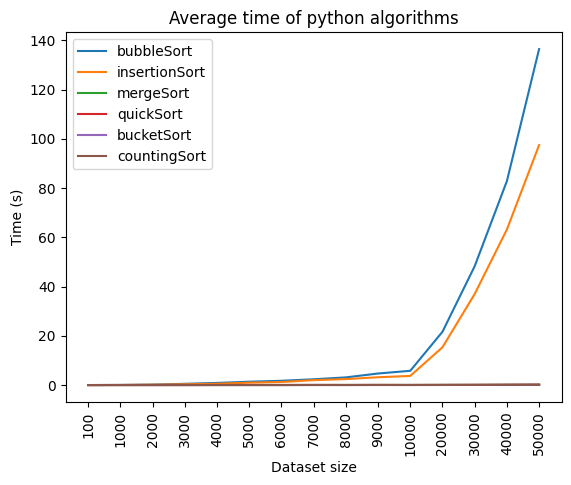

In [457]:
language = "python"

fileName = "./average/" + language + ".json"

with open(fileName) as json_file:
    averagePerLanguage = json.load(json_file)

averagePerLanguage = dict(
    sorted(
        averagePerLanguage.items(), key=lambda x: int(x[0].split("_")[2].split(".")[0])
    )
)

fig = plt.figure()

for alg in algorithmsList:
    x = []
    y = []
    for dataset, times in averagePerLanguage.items():
        x.append(dataset.split("_")[2].split(".")[0])
        y.append(times[alg])
    plt.plot(x, y, label=alg)

plt.xticks(rotation=90)
plt.xlabel("Dataset size")
plt.ylabel("Time (s)")
plt.legend()
plt.title("Average time of " + language + " algorithms")
plt.show()

In [458]:
pd.DataFrame(averagePerLanguage).transpose()

,bubbleSort,insertionSort,mergeSort,quickSort,bucketSort,countingSort
numeros_aleatorios_100.csv,0.000390,0.000296,0.000142,0.000150,0.000082,0.000135
numeros_aleatorios_1000.csv,0.053639,0.038037,0.002206,0.002222,0.003450,0.001454
numeros_aleatorios_2000.csv,0.189885,0.135957,0.003895,0.005863,0.003355,0.003176
numeros_aleatorios_3000.csv,0.502390,0.319598,0.006705,0.007901,0.004900,0.006108
numeros_aleatorios_4000.csv,0.862074,0.523450,0.010252,0.016604,0.013541,0.012115
numeros_aleatorios_5000.csv,1.355364,0.964032,0.015334,0.024580,0.007130,0.012303
numeros_aleatorios_6000.csv,1.729516,1.225119,0.015703,0.019823,0.009177,0.010366
numeros_aleatorios_7000.csv,2.341470,1.996882,0.029774,0.035124,0.017570,0.022518
numeros_aleatorios_8000.csv,3.107798,2.421975,0.024903,0.027975,0.011500,0.018887
numeros_aleatorios_9000.csv,4.688532,3.162779,0.037562,0.043156,0.019421,0.030541


Comparando la velocidad de los tres lenguajes de programación con el dataset mas grande.

In [459]:
averages = {}
for l in languages:
    fileName = f"./average/{l}.json"
    with open(fileName) as json_file:
        averages[l]=json.load(json_file)


In [460]:
biggestDataSet=dataArray[-1]
# print(biggestDataSet)
averagesForBiggestDataSet={}
for l in languages:
    averagesForBiggestDataSet[l]={}
    for alg in algorithmsList:
        averagesForBiggestDataSet[l][alg]=averages[l][biggestDataSet][alg]

In [461]:
pd.DataFrame(averagesForBiggestDataSet).T

,bubbleSort,insertionSort,mergeSort,quickSort,bucketSort,countingSort
cpp,18.400998,10.769763,0.104209,0.114715,0.049197,0.008205
go,3.117542,0.721660,0.007712,0.023407,0.006846,0.004816
python,136.471320,97.478564,0.158458,0.158542,0.072944,0.079372


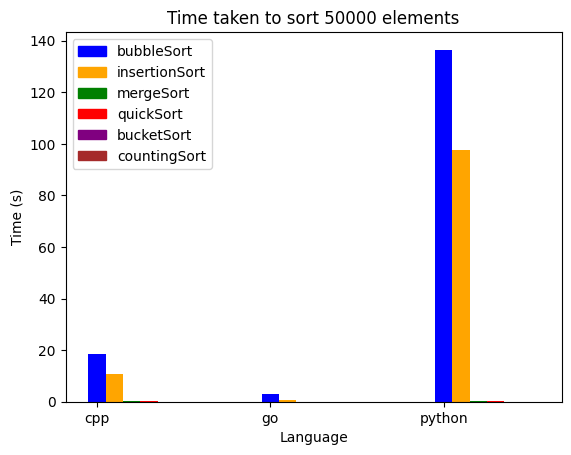

In [462]:
x = np.arange(len(languages))
width = 0.1
multiplier = 0

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

yValues = []

for e in algorithmsList:
    yValues.append([value[e] for key, value in averagesForBiggestDataSet.items()])

for i in range(len(yValues)):
    plt.bar(
        x + width * multiplier, yValues[i], width, label=yValues[i], color=colors[i]
    )
    multiplier += 1

plt.ylabel("Time (s)")
plt.xlabel("Language")
plt.xticks(x, languages)

customLegend = [None] * len(algorithmsList)
for i in range(len(algorithmsList)):
    customLegend[i]=mpatches.Patch(color=colors[i],label=algorithmsList[i])
plt.legend(handles=customLegend)
plt.title("Time taken to sort 50000 elements")


plt.show()

Pintando la tabla de promedios.

In [463]:
currentLanguage="python"
currentAlgorithm=algorithmsList[5]

results={}

for i in range(1,6):
    results[f"record{i}"]={}

for i in range(1,6):
    fileName = f"./results/{currentLanguage}/record{i}.json"
    with open(fileName) as json_file:
        results[f"record{i}"]=json.load(json_file)

resultsForDataset={}

for i in range(1,6):
    resultsForDataset[f"record{i}"]={}
    for key in results[f"record{i}"]:
        # if key == currentDataset:
        #     resultsForDataset[f"record{i}"][key]=results[f"record{i}"][key][currentAlgorithm]
        for d in dataArray:
            resultsForDataset[f"record{i}"][d]=results[f"record{i}"][d][currentAlgorithm]
        



In [464]:
df=pd.DataFrame(resultsForDataset)
df

,record1,record2,record3,record4,record5
numeros_aleatorios_100.csv,0.000113,0.000113,0.000138,0.000137,0.000173
numeros_aleatorios_1000.csv,0.001282,0.001632,0.002032,0.001108,0.001218
numeros_aleatorios_2000.csv,0.002278,0.002212,0.002321,0.006676,0.002396
numeros_aleatorios_3000.csv,0.005404,0.004634,0.008186,0.007974,0.004344
numeros_aleatorios_4000.csv,0.008702,0.016679,0.011233,0.016001,0.007959
numeros_aleatorios_5000.csv,0.010676,0.016656,0.012503,0.011429,0.010250
numeros_aleatorios_6000.csv,0.010956,0.010100,0.011528,0.010303,0.008943
numeros_aleatorios_7000.csv,0.017584,0.041635,0.017360,0.023426,0.012583
numeros_aleatorios_8000.csv,0.018565,0.015535,0.023747,0.021694,0.014895
numeros_aleatorios_9000.csv,0.021045,0.025278,0.035685,0.024219,0.046478


In [465]:
averagesToAdd=[]
fileName = f"./average/{currentLanguage}.json"
with open(fileName) as json_file:
    data=json.load(json_file)
    for key,value in data.items():
        averagesToAdd.append(value[currentAlgorithm])
df.insert(5,"Average",averagesToAdd,True)
print(currentLanguage+" "+currentAlgorithm)
df

python countingSort


,record1,record2,record3,record4,record5,Average
numeros_aleatorios_100.csv,0.000113,0.000113,0.000138,0.000137,0.000173,0.000135
numeros_aleatorios_1000.csv,0.001282,0.001632,0.002032,0.001108,0.001218,0.001454
numeros_aleatorios_2000.csv,0.002278,0.002212,0.002321,0.006676,0.002396,0.003176
numeros_aleatorios_3000.csv,0.005404,0.004634,0.008186,0.007974,0.004344,0.006108
numeros_aleatorios_4000.csv,0.008702,0.016679,0.011233,0.016001,0.007959,0.012115
numeros_aleatorios_5000.csv,0.010676,0.016656,0.012503,0.011429,0.010250,0.012303
numeros_aleatorios_6000.csv,0.010956,0.010100,0.011528,0.010303,0.008943,0.010366
numeros_aleatorios_7000.csv,0.017584,0.041635,0.017360,0.023426,0.012583,0.022518
numeros_aleatorios_8000.csv,0.018565,0.015535,0.023747,0.021694,0.014895,0.018887
numeros_aleatorios_9000.csv,0.021045,0.025278,0.035685,0.024219,0.046478,0.030541
